In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.5f}'.format
pd.options.mode.chained_assignment = None

# 1. Dataset

Vamos a trabajar con el dataset de estadísticas de la NBA.

El dataset contiene las siguientes variables:

* **player**: nombre del jugador
* **position**: posicion que juega el jugador
* **age**: edad
* **team_id**: equipo
* **g**: cantidad de partidos jugados
* **mp_per_g**: minutos por partido
* **trb_per_g**: rebotes por partido
* **ast_per_g**: asistencias por partido
* **stl_per_g**:robos por partido
* **blk_per_g**:tapas/bloqueos por partido
* **pts_per_g**:puntos por partido

In [4]:
# Cargamos el dataset desde el link
#nba = pd.read_csv('/content/drive/MyDrive/Curso CPE Data Wrangling/Clases/datasets/estadisticas_nba.csv')
nba = pd.read_csv('../DataSets/estadisticas_nba.csv')
# Vemos 10 registros al azar
nba.sample(10)

,player,position,age,team_id,g,mp_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g
431,Terrence Ross,SG,28,ORL,69,27.40000,3.20000,1.20000,1.10000,0.30000,14.70000
181,Jerami Grant,PF,25,DEN,71,26.60000,3.50000,1.20000,0.70000,0.80000,12.00000
107,John Collins,PF,22,ATL,41,33.20000,10.10000,1.50000,0.80000,1.60000,21.60000
87,DeMarre Carroll,SF-C,33,TOT,24,12.10000,2.30000,1.00000,0.30000,0.20000,3.60000
374,David Nwaba,SF,27,BRK,20,13.40000,2.30000,0.40000,0.60000,0.60000,5.20000
292,Alex Len,C,26,TOT,55,17.60000,5.80000,0.90000,0.40000,0.90000,8.00000
343,Naz Mitrou-Long,SG,26,IND,5,9.40000,1.40000,1.60000,0.20000,0.20000,2.80000
331,Jordan McRae,SG,28,TOT,37,21.20000,3.40000,2.50000,0.60000,0.40000,11.50000
301,Kevin Love,PF,31,CLE,56,31.80000,9.80000,3.20000,0.60000,0.30000,17.60000
427,Mitchell Robinson,C,21,NYK,61,23.10000,7.00000,0.60000,0.90000,2.00000,9.70000


# 2. Objetivo: crear un análisis de similitud de jugadores

Queremos poder comparar que tan parecidos son dos jugadores en base a ciertas variables de interés: su edad, minutos por partido, puntos por partido y rebotes por partido

Para ello, vamos a utilizar la distancia euclidea para medir la similitud

## 2.1 Distancia euclidea

Para ello vamos a utilizar la distancia euclidea entre los puntos.

La fórmula para calcular la distancia euclidea entre dos puntos $(x_1, y_1)$ y $(x_2, y_2)$es:

$d=\sqrt{(x_1 - x_2)^2+(y_1 - y_2)^2}$

En términos gráficos:

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Distance_Formula.svg/1200px-Distance_Formula.svg.png" width="500"/>
<div>

---

El cálculo de la distancia euclidea como código lo hacemos de la siguiente manera:

```
distancia = np.sqrt(np.sum(np.square(punto1 - punto2)))
```








## 2.2 Escala de las variables

Evaluemos la escala de las variables y su distribución

Primero, observemos los estadísticos descriptivos de las variables

In [5]:
nba.describe()

,age,g,mp_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g
count,529.00000,529.00000,529.00000,529.00000,529.00000,529.00000,529.00000,529.00000
mean,25.56144,42.33081,19.51304,3.63270,1.92363,0.62193,0.39905,8.72647
std,4.11949,22.63332,9.21021,2.48097,1.76254,0.40280,0.41187,6.36797
min,19.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,22.00000,22.00000,12.00000,1.90000,0.80000,0.30000,0.10000,3.90000
50%,25.00000,48.00000,18.90000,3.20000,1.40000,0.60000,0.30000,7.00000
75%,28.00000,62.00000,27.80000,4.70000,2.40000,0.90000,0.50000,11.90000
max,43.00000,74.00000,37.50000,15.20000,10.20000,2.10000,2.90000,34.30000


¿Qué observamos con estos datos?

Las variables son todas no negativas pero como se refieren a atributos distintos se encuentran medidas en unidades distintas.

# 3 Escalamiento

Como ya vimos, al tener distintas unidades de medida va a ser necesario realizar un escalamiento para poder medir la distancia.

Para poder decidir qué método nos conviene utilizar debemos ver la distribución de las variables

## 3.1 Distribución de las variables

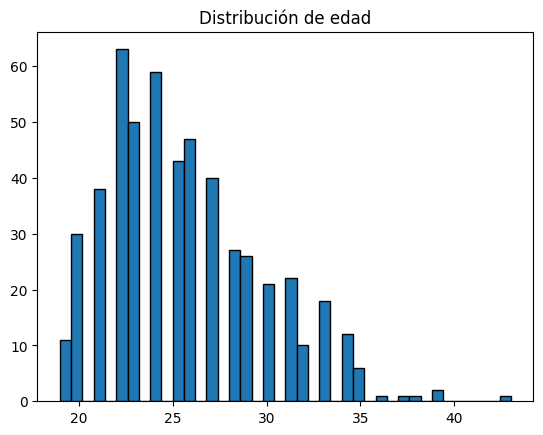

In [6]:
# Distribución de la edad
plt.hist(nba['age'], bins=40, ec='black')
plt.title("Distribución de edad")
plt.show()

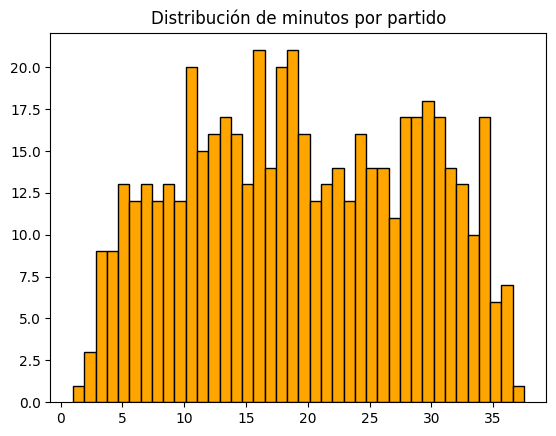

In [7]:
# Distribucion de los minutos por partido
plt.hist(nba['mp_per_g'], bins=40, ec='black', color="orange")
plt.title("Distribución de minutos por partido")
plt.show()

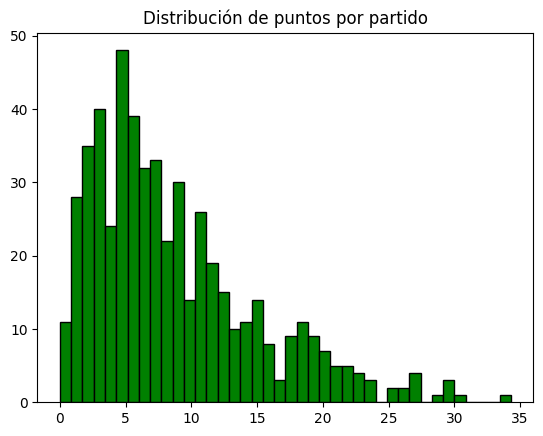

In [8]:
# Distribucion de los puntos por partido
plt.hist(nba['pts_per_g'], bins=40, ec='black', color="green")
plt.title("Distribución de puntos por partido")
plt.show()

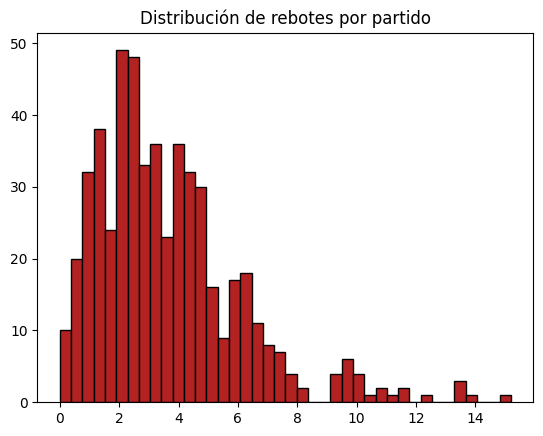

In [9]:
# Distribucion de los rebotes por partido
plt.hist(nba['trb_per_g'], bins=40, ec='black', color="firebrick")
plt.title("Distribución de rebotes por partido")
plt.show()

¿Qué distribución tiene cada variable?

* **Edad**: Tiene una forma de campana aunque más tirada hacia la izquierda
* **Minutos por partido**: Esta centrada y con una leve forma de campana
* **Puntos por partido**: Tiene una forma de campana aunque más tirada hacia la izquierda
* **Rebotes por partido**: Tiene una forma de campana aunque más tirada hacia la izquierda

Es posible realizar una estandarización o normalización.

### ¿Es posible aplicar normalización en unas variables y estandarización en otras?

No, seguiríamos teniendo problemas con las distinas escalas que se obtienen luego de los distintos procesos.

## 3.2 Estandarización 

La fórmula para estandarizar una variable es:

$ x_e = \frac{x-\overline{X}}{\sigma_X}$

¿Qué datos necesitamos para normalizar una variable?

El promedio y el desvío. Vamos a utilizar las funciones `numpy.mean()` y `numpy.std()`


### 3.2.1 Definición de la función

En el trabajo anterior repetimos muchas veces las mismas operaciones para normalizar las variables. Para evitar repetir los pasos de la estandarización, armemos una función llamada `estandarizar_var(X)` la cual toma una variable X y la devuelve estandarizada

In [10]:
def estandarizar_var(X):
  promedio = np.mean(X)
  desvio = np.std(X)
  X_estandarizada = (X-promedio)/desvio
  return X_estandarizada

### 3.2.1 Estandarización de las variables


In [11]:
# Edad
edad_estand = estandarizar_var(nba['age'])
# Minutos por partido
mp_estand = estandarizar_var(nba['mp_per_g'])
# Puntos por partido
pts_estand = estandarizar_var(nba['pts_per_g'])
# Rebotes por partido
trb_estand = estandarizar_var(nba['trb_per_g'])

Crear un dataframe con las variables estandarizadas y el nombre del jugador y su posición

In [12]:
nba_estand = pd.DataFrame({'jugador':nba['player'], 'posicion':nba['position'], 'age':edad_estand,
                                 'mp_per_g': mp_estand, 'pts_per_g': pts_estand, 'trb_per_g': trb_estand})
nba_estand.head()

,jugador,posicion,age,mp_per_g,pts_per_g,trb_per_g
0,Steven Adams,C,0.10656,0.78106,0.34165,2.28647
1,Bam Adebayo,PF,-0.86535,1.53094,1.12757,2.64958
2,LaMarcus Aldridge,C,2.05039,1.47660,1.59912,1.51992
3,Kyle Alexander,C,-0.62237,-1.41423,-1.21448,-0.86044
4,Nickeil Alexander-Walker,SG,-1.10833,-0.75129,-0.47571,-0.73940


In [13]:
#Podemos aplicar la función sobre las variables con la función apply
nba_estandarizadas = nba.loc[:,['age', 'mp_per_g', 'pts_per_g', 'trb_per_g']].apply(estandarizar_var)
nba_estandarizadas.head()

,age,mp_per_g,pts_per_g,trb_per_g
0,0.10656,0.78106,0.34165,2.28647
1,-0.86535,1.53094,1.12757,2.64958
2,2.05039,1.47660,1.59912,1.51992
3,-0.62237,-1.41423,-1.21448,-0.86044
4,-1.10833,-0.75129,-0.47571,-0.73940


Observemos los estadisticos descriptivos principales para nuestro nuevo dataset

In [14]:
nba_estand.describe()

,age,mp_per_g,pts_per_g,trb_per_g
count,529.00000,529.00000,529.00000,529.00000
mean,-0.00000,-0.00000,0.00000,0.00000
std,1.00095,1.00095,1.00095,1.00095
min,-1.59429,-2.01196,-1.37166,-1.46561
25%,-0.86535,-0.81650,-0.75865,-0.69906
50%,-0.13642,-0.06662,-0.27137,-0.17457
75%,0.59252,0.90061,0.49883,0.43060
max,4.23719,1.95478,4.01976,4.66683


Vemos que el promedio de las variables es igual a cero y su desvío es igual uno. Esto se debe al proceso de estandarización

# 4. Medicion de distancia

Ahora que contamos con las variables escaladas podemos realizar nuestra medición de distancia entre jugadores.

Pero también para evitar realizar muchos pasos de manera repetida vamos a realizar una función que nos permita calcular la distancia entre dos jugadores en base a las variables que queramos.

La función se va a llamar `medir_distancias(df, jugador_1, jugador_2, lista_variables)` y tomara como variables el dataset, el nombre del jugador 1 y del jugador 2 y con que variables queremos compararlos.

In [15]:
def medir_distancias(df, jugador_1, jugador_2, lista_variables):
  # Obtener los puntos
  punto1 = df.loc[df['jugador']==jugador_1, lista_variables].values
  punto2 = df.loc[df['jugador']==jugador_2, lista_variables].values
  # Calculamos la distancia
  distancia = np.sqrt(np.sum(np.square(punto1 - punto2)))

  return distancia


## 4.1 Comparación de jugadores

Comparemos a LeBron James contra James Harden, Stephen Curry, Rudy Gobert, Rajon Rondo y Kyle Kuzma en base a los minutos, puntos y rebotes

In [16]:
medir_distancias(nba_estand, 'LeBron James', 'James Harden', ['mp_per_g', 'pts_per_g', 'trb_per_g'])

1.5094014997790397

En lugar de escribir 5 veces la funcion, podemos utilizar un loop

In [17]:
# Definimos la lista de comparacion
lista_comparacion = ["James Harden", "Stephen Curry", "Rudy Gobert", "Rajon Rondo", "Kyle Kuzma"]

# Definimos el loop
for jugador in lista_comparacion:
  distancia = medir_distancias(nba_estand, 'LeBron James', jugador, ['mp_per_g', 'pts_per_g', 'trb_per_g'])
  print(f"La distancia entre LeBron James y {jugador} es: {distancia}")

La distancia entre LeBron James y James Harden es: 1.5094014997790397
La distancia entre LeBron James y Stephen Curry es: 1.4651928476511646
La distancia entre LeBron James y Rudy Gobert es: 2.803575986134848
La distancia entre LeBron James y Rajon Rondo es: 3.7791960807511074
La distancia entre LeBron James y Kyle Kuzma es: 2.5925935000478666


Ahora propongan una nueva comparacion con otras variables y si quieren para otros jugadores

## Opcionales

## Estandarizacion con normalización 

Ahora realicemos una funcion para normalizar las mismas 4 variables y medir las distancias con las variables normalizadas

La fórmula para normalizar una variable es:

$ x_e = \frac{x-min(X)}{max(X)-min(X)}$

¿Qué datos necesitamos para normalizar una variable?

El mínimo y máximo

### Definir una funcion para normalizar variables

In [18]:
def normalizar_var(X):
  minimo = min(X)
  maximo = max(X)
  rango = maximo-minimo
  X_normalizada = (X-minimo)/rango
  return X_normalizada

### Crear un dataframe con las variables normalizadas y el nombre del jugador y su posición

In [19]:
#Podemos aplicar la función sobre las variables con la función apply
nba_normalizadas = nba.loc[:,['age', 'mp_per_g', 'pts_per_g', 'trb_per_g']].apply(normalizar_var)
nba_normalizadas.head()

,age,mp_per_g,pts_per_g,trb_per_g
0,0.29167,0.70411,0.31778,0.61184
1,0.12500,0.89315,0.46356,0.67105
2,0.62500,0.87945,0.55102,0.48684
3,0.16667,0.15068,0.02915,0.09868
4,0.08333,0.31781,0.16618,0.11842


In [20]:
# Agregamos el jugador y posicion
nba_normalizadas['jugador'] = nba.player
nba_normalizadas['posicion'] = nba.position

### Comparar a LeBron James contra James Harden, Stephen Curry, Rudy Gobert, Rajon Rondo y Kyle Kuzma en base a los minutos, puntos y rebotes

In [21]:
# Definimos la lista de comparacion
lista_comparacion = ["James Harden", "Stephen Curry", "Rudy Gobert", "Rajon Rondo", "Kyle Kuzma"]

# Definimos el loop
for jugador in lista_comparacion:
  distancia = medir_distancias(nba_normalizadas, 'LeBron James', jugador, ['mp_per_g', 'pts_per_g', 'trb_per_g'])
  print(f"La distancia entre LeBron James y {jugador} es: {distancia}")

La distancia entre LeBron James y James Harden es: 0.27891083271707096
La distancia entre LeBron James y Stephen Curry es: 0.2849200224297243
La distancia entre LeBron James y Rudy Gobert es: 0.4786701325040268
La distancia entre LeBron James y Rajon Rondo es: 0.7283550607248114
La distancia entre LeBron James y Kyle Kuzma es: 0.4991204359549616


Observamos que segun esta forma de escalar el jugador mas parecido a LeBron es James Harden mientras que con la estandarizacion el más parecido es Stephen Curry